In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score, precision_score,recall_score,plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization



le = LabelEncoder()
rScaler = RobustScaler()

In [2]:
dfTrain=pd.read_csv("NSL_KDD_Train.csv",sep=",",encoding="utf-8")

In [3]:
dfTrain.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [4]:
dfTrain.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,150,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dfTrain.shape

(125972, 42)

In [6]:
#Check types for all the columns using dtypes
dfTrain.dtypes

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.18          int64
2             int64
2.1           int64
0.19        float64
0.20        float64
0.21        float64
0.22        float64
1           float64
0.23        float64
0.24        float64
150           int64
25            int64
0.17        float64
0.03        float64
0.17.1      float64
0.25        float64
0.26        float64
0.27        float64
0.05        float64
0.28        float64
normal       object
dtype: object

In [7]:
dfTrain.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [8]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class'])

dfTrain.columns = columns

dfTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [9]:
dfTrain["class"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [10]:
dfTrain['class'] = (dfTrain['class'] != "normal") * 1

dfTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

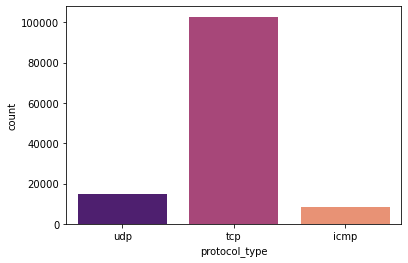

In [11]:
sns.countplot(x=dfTrain["protocol_type"],palette="magma")

<AxesSubplot:ylabel='class'>

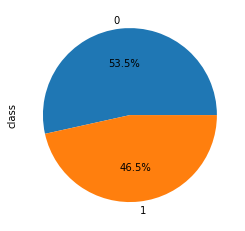

In [12]:
round(dfTrain["class"].value_counts()/dfTrain.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')

<AxesSubplot:xlabel='class', ylabel='count'>

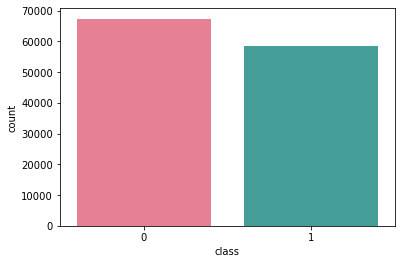

In [13]:
sns.countplot(x=dfTrain["class"],palette="husl")

In [14]:
dfTrain.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
dfTrain.duplicated().any()

True

In [16]:
dfTrain.drop_duplicates(keep=False,inplace=True)

In [17]:
dfTrain.duplicated().any()

False

In [18]:
print(dfTrain.shape)

(125955, 42)


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'land'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>],
       [<AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>],
       [<AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>,
        <AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'is_host_login'}>],
       [<AxesSubplot:titl

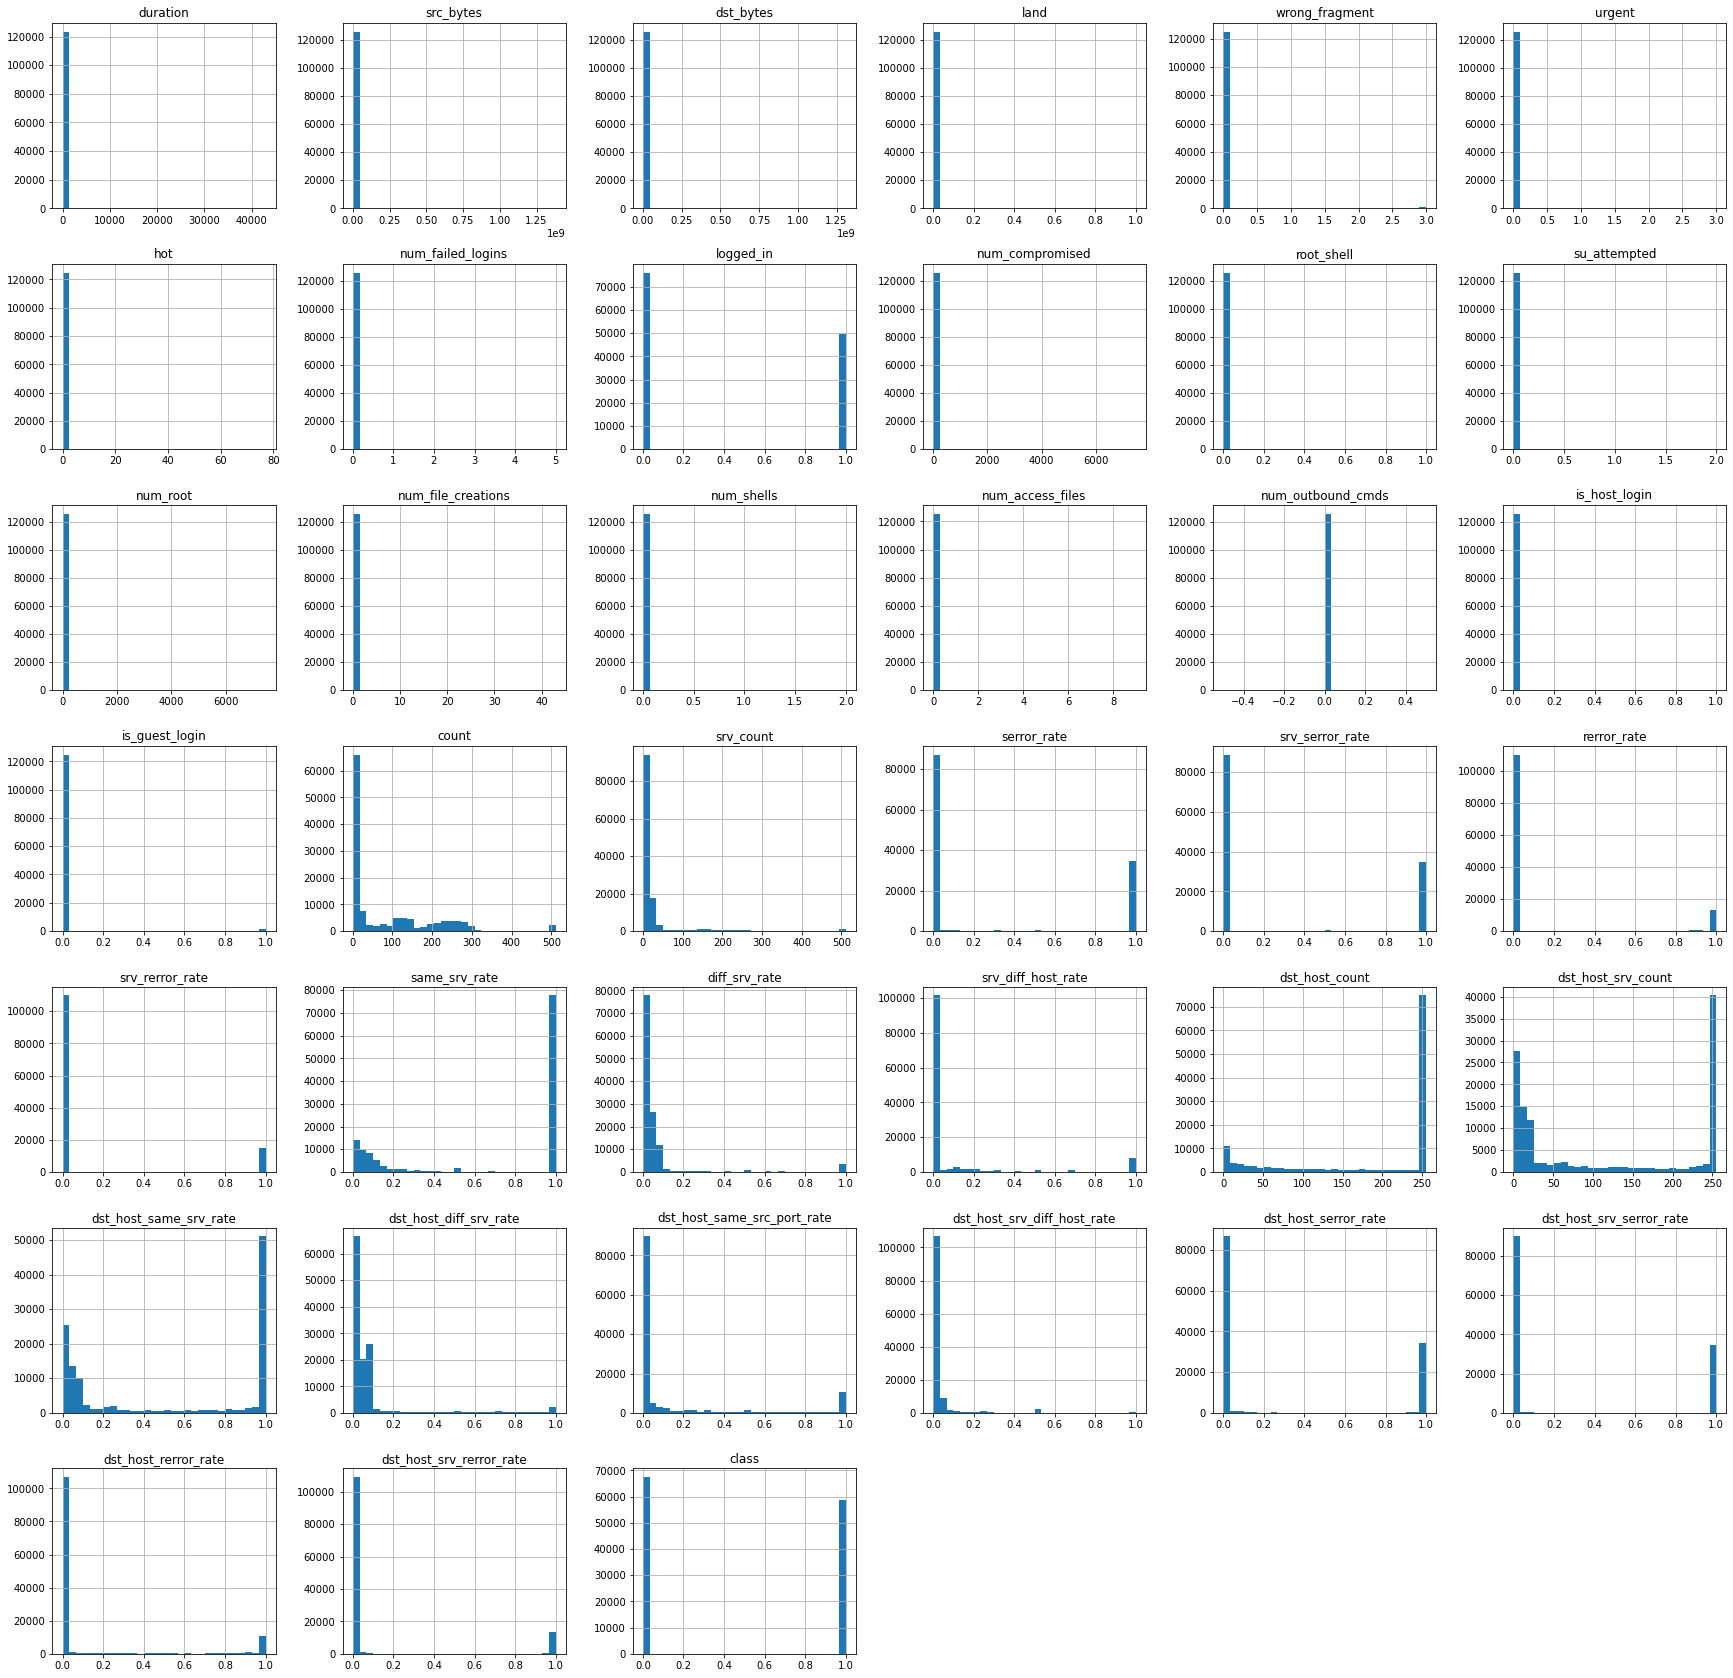

In [19]:
# drawing hist plot graphs for all columns
dfTrain.hist(bins=30,figsize=[30,30])

In [20]:
# transforming the datatype (Encoding)
dfTrain['protocol_type'] = le.fit_transform(dfTrain['protocol_type'])
dfTrain['service'] = le.fit_transform(dfTrain['service'])
dfTrain['flag'] = le.fit_transform(dfTrain['flag'])

In [21]:
# getting all possible values in column by using value_counts() function
print(dfTrain["protocol_type"].value_counts())
print(dfTrain["service"].value_counts())
print(dfTrain["flag"].value_counts())

1    102688
2     14993
0      8274
Name: protocol_type, dtype: int64
24    40338
49    21853
12     9043
54     7313
20     6859
      ...  
61        3
27        2
3         2
22        2
25        1
Name: service, Length: 70, dtype: int64
9     74927
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64


In [22]:
dfTrain.dtypes

duration                         int64
protocol_type                    int32
service                          int32
flag                             int32
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

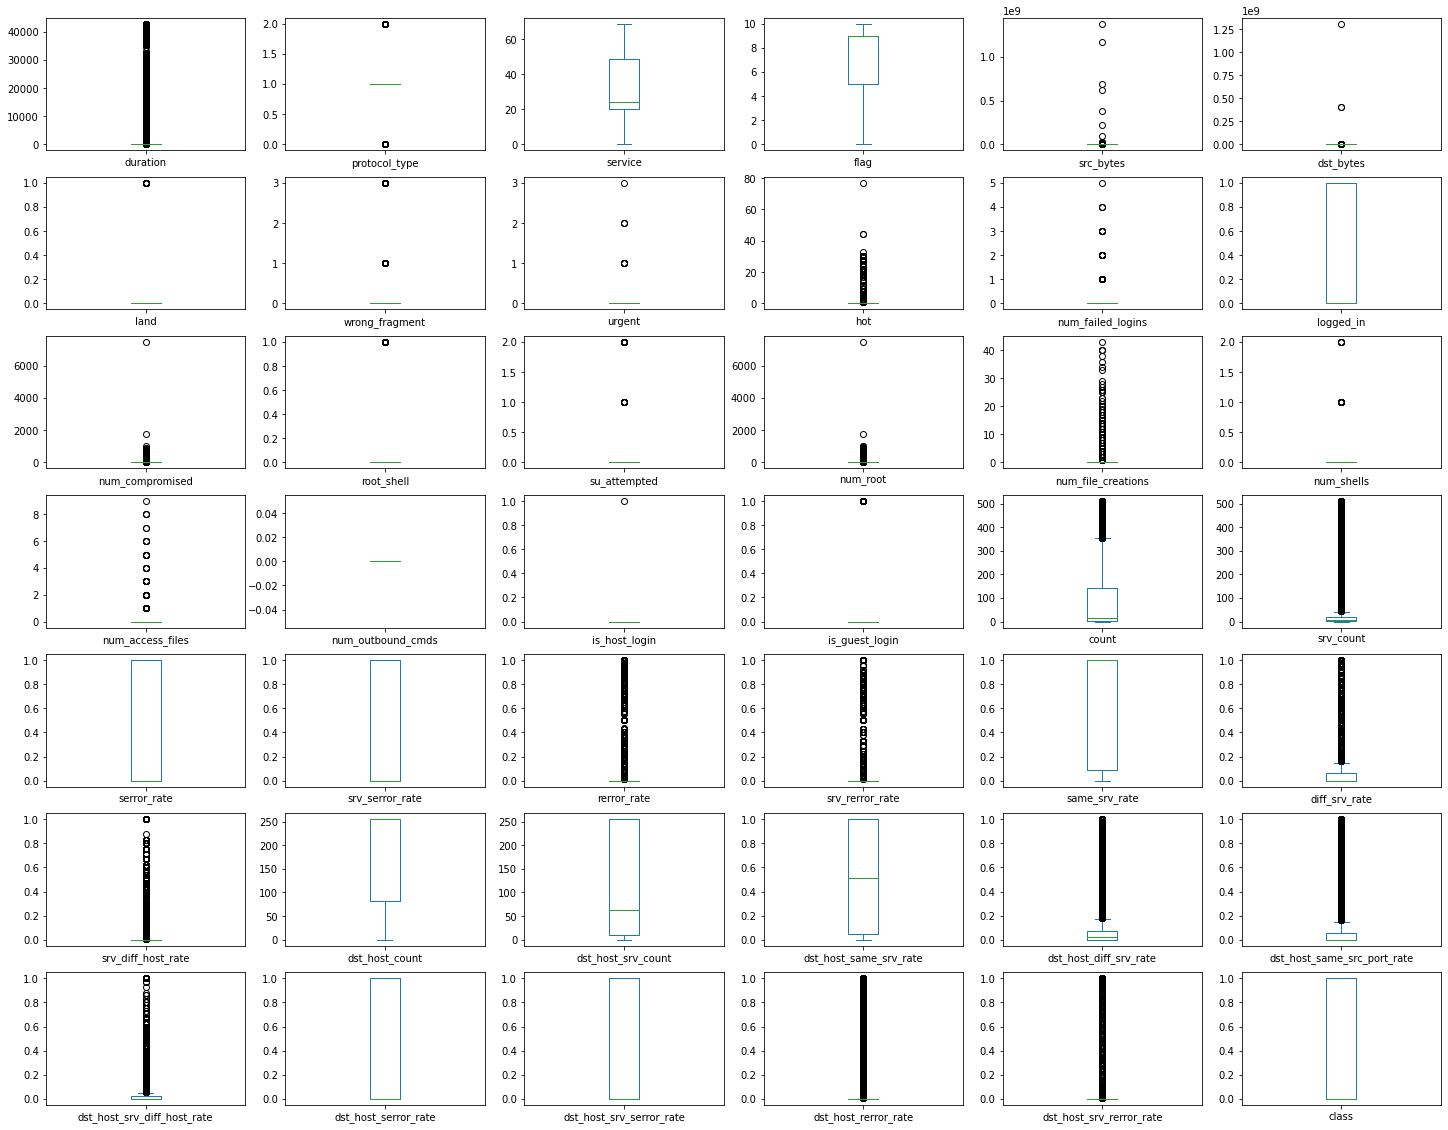

In [23]:
# drawing a box plots for all columns

dfTrain.plot(kind='box', subplots=True, layout=(7,6), figsize=(25,20))
plt.show()

In [24]:
x = dfTrain.drop(['class'], axis=1)
y = dfTrain['class'].copy()

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state=42)

In [25]:
x_train.shape

(94466, 41)

In [26]:
y_train.shape

(94466,)

In [27]:
x_test.shape

(31489, 41)

In [28]:
x_train = rScaler.fit_transform(x_train)
x_test = rScaler.fit_transform(x_test)

In [29]:
k1=KNeighborsClassifier(n_neighbors=5)

In [30]:
k1.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
k1.score(x_train,y_train)

0.9941989710583702

In [32]:
k1.score(x_test,y_test)

0.991933691130236

In [33]:
y_pred=k1.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
107031,0,0
71713,0,0
30765,1,1
46897,1,1
52533,0,0
79386,1,1
22929,0,0
37297,0,0
5616,0,0
6331,0,0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

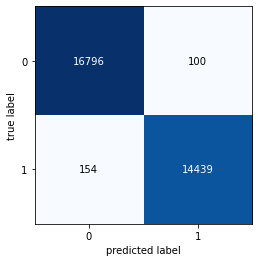

In [34]:
plot_confusion_matrix(confusion_matrix(y_test, k1.predict(x_test)))

In [35]:
dt=DecisionTreeClassifier(max_depth=18)

In [36]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=18)

In [37]:
dt.score(x_train,y_train)

0.9999576567230538

In [38]:
dt.score(x_test,y_test)

0.9761186446060529

In [39]:
dt.fit(x_train, y_train)
y_pred_tree = dt.predict(x_test)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

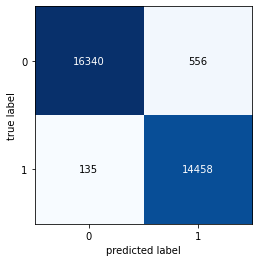

In [40]:
plot_confusion_matrix(confusion_matrix(y_test, dt.predict(x_test)))

In [41]:
rf=RandomForestClassifier(max_depth=5)

In [42]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [43]:
rf.score(x_train,y_train)

0.9862913640886668

In [44]:
rf.score(x_test,y_test)

0.985010638635714

In [45]:
rfst = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rfst.fit(x_train, y_train)
y_pred_rfst = rfst.predict(x_test)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

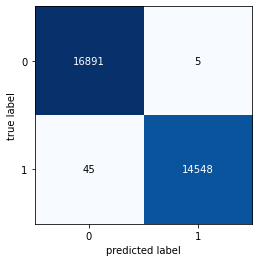

In [46]:
plot_confusion_matrix(confusion_matrix(y_test, rfst.predict(x_test)))

In [47]:
lin = SVC(kernel='linear',C=1,gamma=0.7)
lin.fit(x_train[0:10000], y_train[0:10000])

SVC(C=1, gamma=0.7, kernel='linear')

In [48]:
y_pred_Linear = lin.predict(x_test)
print(classification_report(y_test, y_pred_Linear))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     16896
           1       0.94      0.93      0.94     14593

    accuracy                           0.94     31489
   macro avg       0.94      0.94      0.94     31489
weighted avg       0.94      0.94      0.94     31489



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

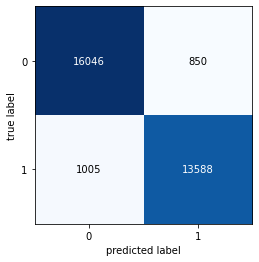

In [49]:
plot_confusion_matrix(confusion_matrix(y_test, lin.predict(x_test)))

In [50]:
print("f1 score: ", f1_score(y_test,lin.predict(x_test)))
print("Recall: ", recall_score(y_test,lin.predict(x_test)))
print("precision: ", precision_score(y_test,lin.predict(x_test)))

f1 score:  0.9361027866763116
Recall:  0.9311313643527719
precision:  0.9411275799972295


In [51]:
accuracy = metrics.accuracy_score(y_test,y_pred_Linear)
sensitivity = metrics.recall_score(y_test,y_pred_Linear)
precision = metrics.precision_score(y_test,y_pred_Linear)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.941
Sensitvity  = 0.931
Precision   = 0.941


In [52]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_Linear})
df.head(30)

,Y_test,Y_pred
107031,0,0
71713,0,0
30765,1,1
46897,1,1
52533,0,0
79386,1,1
22929,0,0
37297,0,0
5616,0,0
6331,0,0


In [53]:
rbf = SVC(kernel='rbf',C=1,gamma=0.6)
rbf.fit(x_train[0:10000], y_train[0:10000])

y_pred_RBF = rbf.predict(x_test)
print(classification_report(y_test, y_pred_RBF))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16896
           1       1.00      0.93      0.96     14593

    accuracy                           0.96     31489
   macro avg       0.97      0.96      0.96     31489
weighted avg       0.97      0.96      0.96     31489



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

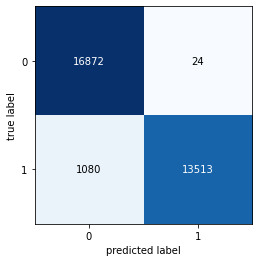

In [54]:
plot_confusion_matrix(confusion_matrix(y_test, rbf.predict(x_test)))

In [55]:
print("f1 score: ", f1_score(y_test,rbf.predict(x_test)))
print("Recall: ", recall_score(y_test,rbf.predict(x_test)))
print("precision: ", precision_score(y_test,rbf.predict(x_test)))

f1 score:  0.9607536437966584
Recall:  0.925991913931337
precision:  0.9982270813326438


In [56]:
accuracy = metrics.accuracy_score(y_test,y_pred_RBF)
sensitivity = metrics.recall_score(y_test,y_pred_RBF)
precision = metrics.precision_score(y_test,y_pred_RBF)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.965
Sensitvity  = 0.926
Precision   = 0.998


In [57]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_RBF})
df.head(30)

,Y_test,Y_pred
107031,0,0
71713,0,0
30765,1,1
46897,1,1
52533,0,0
79386,1,1
22929,0,0
37297,0,0
5616,0,0
6331,0,0


In [58]:
poly = SVC(kernel='poly',degree=3)
poly.fit(x_train[0:10000], y_train[0:10000])

y_pred_Poly = poly.predict(x_test)
print(classification_report(y_test, y_pred_Poly))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70     16896
           1       0.92      0.01      0.03     14593

    accuracy                           0.54     31489
   macro avg       0.73      0.51      0.36     31489
weighted avg       0.72      0.54      0.39     31489



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

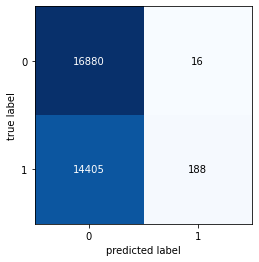

In [59]:
plot_confusion_matrix(confusion_matrix(y_test, poly.predict(x_test)))

In [60]:
print("f1 score: ", f1_score(y_test,poly.predict(x_test)))
print("Recall: ", recall_score(y_test,poly.predict(x_test)))
print("precision: ", precision_score(y_test,poly.predict(x_test)))

f1 score:  0.025410556193823073
Recall:  0.012882889056396903
precision:  0.9215686274509803


In [61]:
accuracy = metrics.accuracy_score(y_test,y_pred_Poly)
sensitivity = metrics.recall_score(y_test,y_pred_Poly)
precision = metrics.precision_score(y_test,y_pred_Poly)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.542
Sensitvity  = 0.013
Precision   = 0.922


In [62]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_Poly})
df.head(30)

,Y_test,Y_pred
107031,0,0
71713,0,0
30765,1,0
46897,1,0
52533,0,0
79386,1,0
22929,0,0
37297,0,0
5616,0,0
6331,0,0


In [63]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred_Gauss = GNB.predict(x_test)

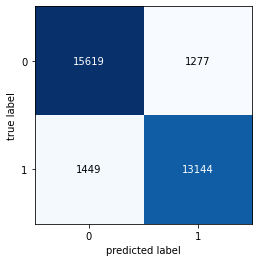

In [64]:
# Confusion matrix.
plot_confusion_matrix(confusion_matrix(y_test, GNB.predict(x_test)))
conf_mat = confusion_matrix(y_test, y_pred_Gauss)

In [65]:
print("f1 score: ", f1_score(y_test,GNB.predict(x_test)))
print("Recall: ", recall_score(y_test,GNB.predict(x_test)))
print("precision: ", precision_score(y_test,GNB.predict(x_test)))

f1 score:  0.9060453574136624
Recall:  0.9007058178578771
precision:  0.9114485819291311


In [66]:
accuracy = metrics.accuracy_score(y_test,y_pred_Gauss)
sensitivity = metrics.recall_score(y_test,y_pred_Gauss)
precision = metrics.precision_score(y_test,y_pred_Gauss)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.913
Sensitvity  = 0.901
Precision   = 0.911


In [67]:
annModel =Sequential()
annModel.add(Dense(units = 20,activation = 'relu'))
annModel.add(BatchNormalization())
annModel.add(Dropout(0.5))
annModel.add(Dense(units = 20,activation = 'relu'))
annModel.add(BatchNormalization())
annModel.add(Dropout(0.5))
annModel.add(Dense(units = 20,activation = 'relu'))
annModel.add(BatchNormalization())
annModel.add(Dropout(0.5))
annModel.add(Dense(units = 1,activation = 'sigmoid'))
annModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30 )
model=annModel.fit(x_train, y_train,batch_size = 64,
                   validation_data=(x_test, y_test),
                   epochs =500,
                   callbacks = [earlyStop])

Epoch 1/500
1477/1477 [==============================] - 7s 4ms/step - loss: 0.3750 - accuracy: 0.8386 - val_loss: 0.3351 - val_accuracy: 0.9120
Epoch 2/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.1788 - accuracy: 0.9338 - val_loss: 0.2185 - val_accuracy: 0.9129
Epoch 3/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.1682 - accuracy: 0.9378 - val_loss: 0.6045 - val_accuracy: 0.9304
Epoch 4/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.9410 - val_loss: 0.1621 - val_accuracy: 0.9371
Epoch 5/500
1477/1477 [==============================] - 6s 4ms/step - loss: 0.1418 - accuracy: 0.9467 - val_loss: 0.2012 - val_accuracy: 0.9387
Epoch 6/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.1349 - accuracy: 0.9486 - val_loss: 0.1038 - val_accuracy: 0.9614
Epoch 7/500
1477/1477 [==============================] - 5s 4ms/step - loss: 0.1320 - accuracy: 0.9496 - val_loss: 0.3601 - val_ac

1477/1477 [==============================] - 5s 3ms/step - loss: 0.0907 - accuracy: 0.9656 - val_loss: 0.1471 - val_accuracy: 0.9632
Epoch 58/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0916 - accuracy: 0.9658 - val_loss: 0.1635 - val_accuracy: 0.9679
Epoch 59/500
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0851 - accuracy: 0.9679 - val_loss: 0.1331 - val_accuracy: 0.9676
Epoch 60/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9684 - val_loss: 0.1516 - val_accuracy: 0.9661
Epoch 61/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9663 - val_loss: 0.1456 - val_accuracy: 0.9623
Epoch 62/500
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0916 - accuracy: 0.9677 - val_loss: 0.1517 - val_accuracy: 0.9671
Epoch 63/500
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0884 - accuracy: 0.9681 - val_loss: 0.1168 - val_accuracy

In [68]:
y_pred_ann = annModel.predict(x_test)
y_pred_ann = (y_pred_ann>0.5)

985/985 [==============================] - 3s 3ms/step


In [69]:
accuracy = metrics.accuracy_score(y_test,y_pred_ann)
sensitivity = metrics.recall_score(y_test,y_pred_ann)
precision = metrics.precision_score(y_test,y_pred_ann)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.964
Sensitvity  = 0.924
Precision   = 0.998
